### Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/UNI/MAGISTRALE/ANNDL/Challenge 1'

Mounted at /content/drive
/content/drive/MyDrive/UNI/MAGISTRALE/ANNDL/Challenge 1


## Load and visualize samples

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.spatial.distance import euclidean
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
#reading data from the original dataset
data = np.load('public_data.npz', allow_pickle=True)
lst = data.files
items = data['data']
labels = data['labels']
print(lst)
print(items.shape)
print(labels.shape)

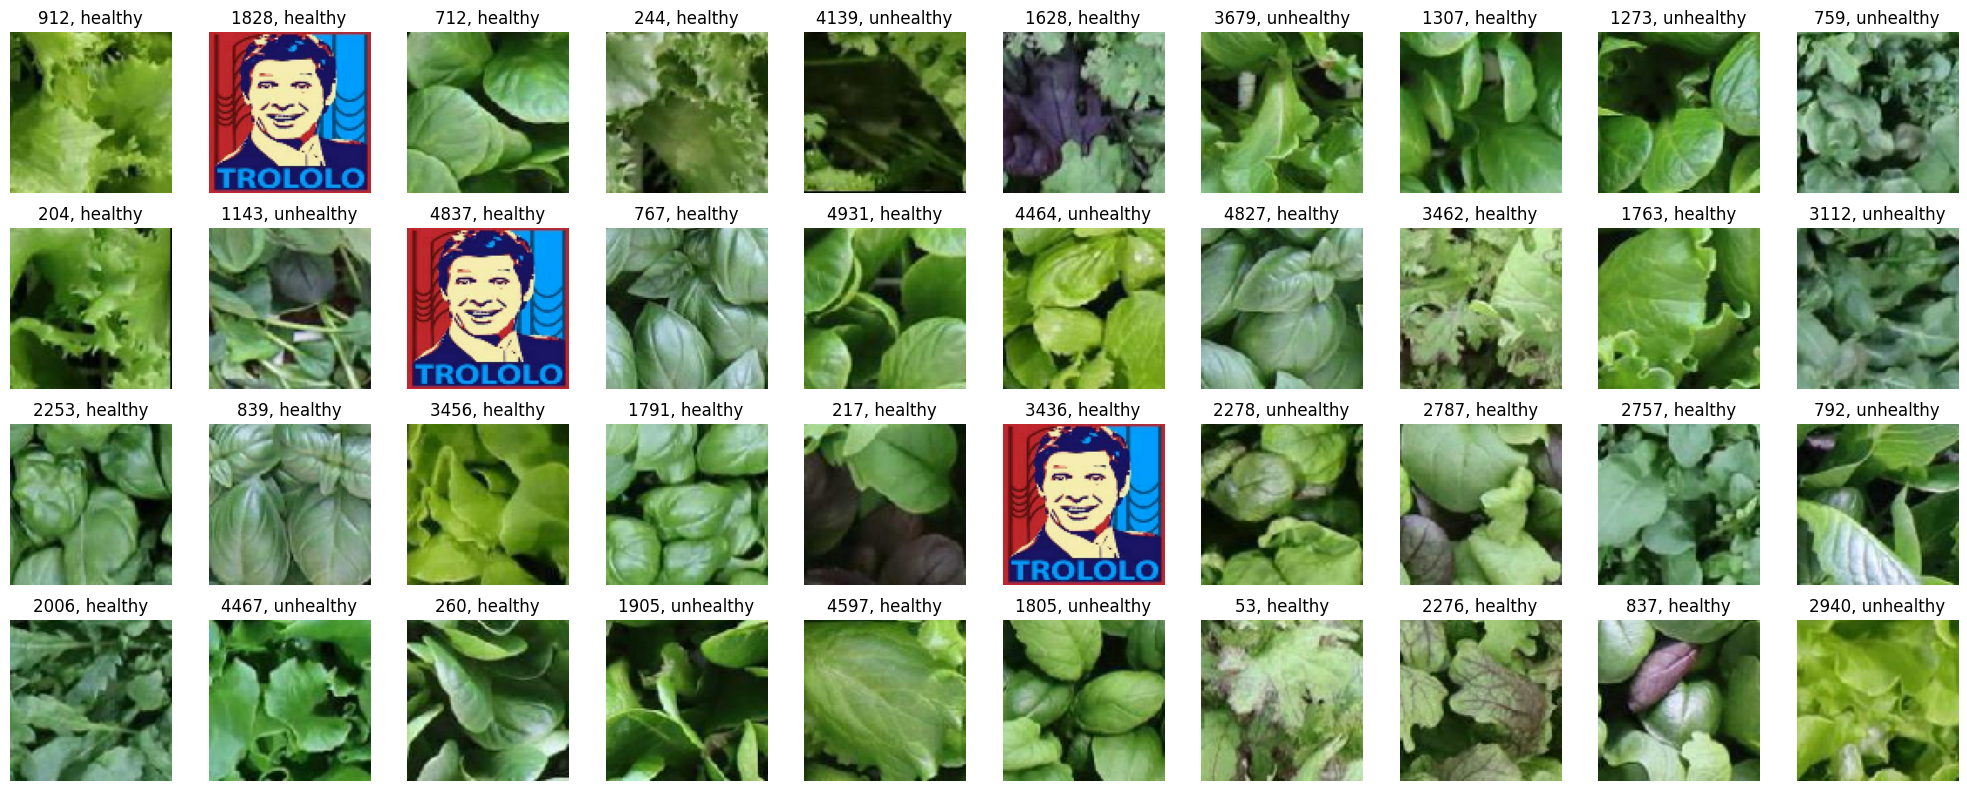

In [ ]:
import matplotlib.pyplot as plt
import random

# Number of images to display
num_img = 40

# Create subplots for displaying items
fig, axes = plt.subplots(4, num_img//4, figsize=(20, 8))
for i in range(num_img):
    ax = axes[i%4, i%num_img//4]
    index = random.randint(0,normalized_images.shape[0])
    ax.imshow(np.clip(normalized_images[index], 0, 255))  # Display clipped item images
    ax.title.set_text(str(index) + ", " + data['labels'][index])
    ax.axis('off')
plt.tight_layout()

plt.show()

In [ ]:
#label names
print(set(data['labels']))

{'healthy', 'unhealthy'}


## Removing shrek and troll outliers

In [ ]:
#Getting the average of the 3 channels to have a single matrix for each image
data_mean = np.mean(items, axis = -1)
data_mean.shape

In [ ]:
# finds copies of the image (A) in a given index.
# includes all the images (B) which distance from A is within eps
def find_copies(img_idx, eps=0):
  copies_idx = set()
  copies_idx.add(img_idx)
  for i in range(data['data'].shape[0]):
    distance = np.linalg.norm(data_mean[img_idx] - data_mean[i])
    if distance <= eps:
      copies_idx.add(i)
  return list(copies_idx)

98


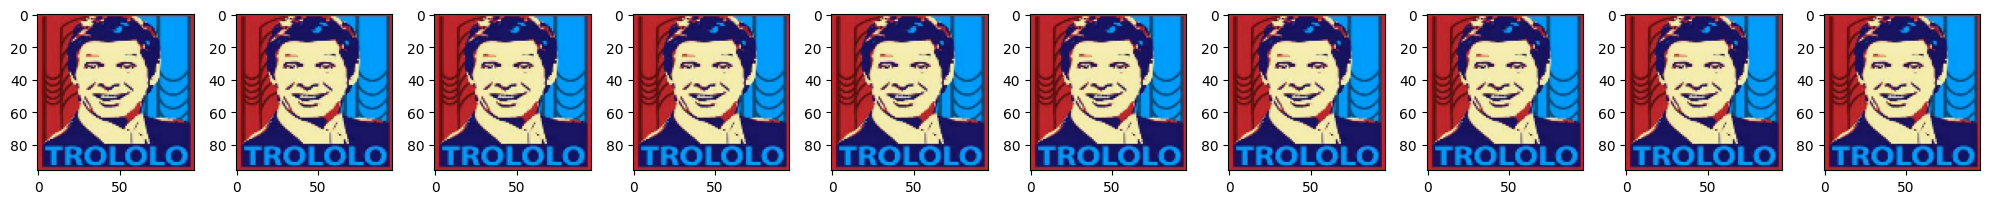

In [ ]:
#find copies of troll image
troll_idx = 2198
copies_idx_troll = find_copies(troll_idx)
print(len(copies_idx_troll))

# visualize some copies
num_img = 10
fig, axes = plt.subplots(1, num_img, figsize=(20,20))
for i in range(num_img):
    ax = axes[i%num_img]
    ax.imshow(np.clip(items[copies_idx_troll[i]].astype("uint8"), 0, 255))
plt.tight_layout()
plt.show()

98


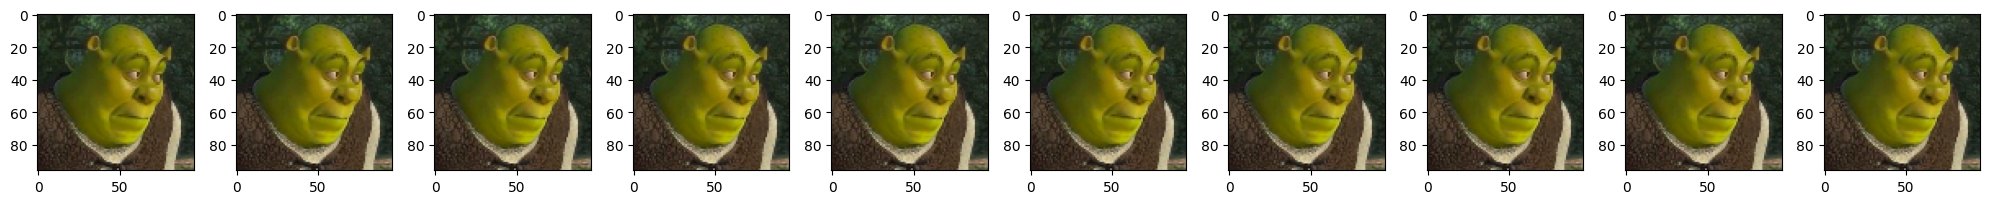

In [ ]:
#find copies of troll image
shrek_idx = 2755
copies_idx_shrek = find_copies(shrek_idx)
print(len(copies_idx_shrek))

# visualize some copies
num_img = 10
fig, axes = plt.subplots(1, num_img, figsize=(20,20))
for i in range(num_img):
    ax = axes[i%num_img]
    ax.imshow(np.clip(items[copies_idx_shrek[i]].astype("uint8"), 0, 255))
plt.tight_layout()
plt.show()

105


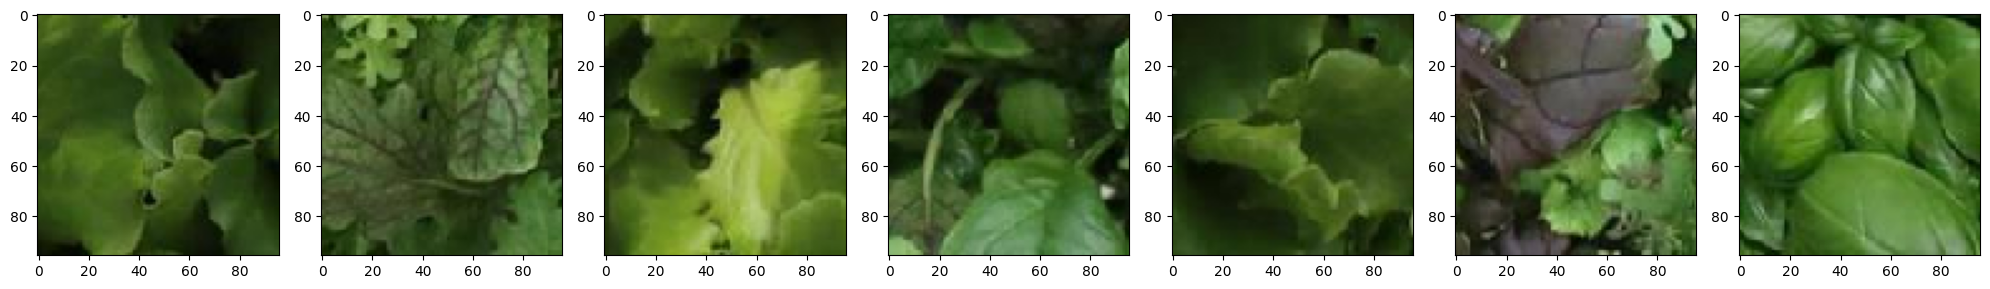

In [ ]:
#find copies of shrek image with a margin of error
copies_idx_shrek_margin = find_copies(shrek_idx, 4200)
print(len(copies_idx_shrek_margin))

copies_idx_shrek_margin = list(filter(lambda x: x not in copies_idx_shrek, copies_idx_shrek_margin))

# visualize
num_img = min(10,len(copies_idx_shrek_margin))
fig, axes = plt.subplots(1, num_img, figsize=(20,20))
for i in range(num_img):
    ax = axes[i%num_img]
    ax.imshow(np.clip(items[copies_idx_shrek_margin[i]].astype("uint8"), 0, 255))
plt.tight_layout()
plt.show()

There are no other outliers that are "similar" to the shrek image

104


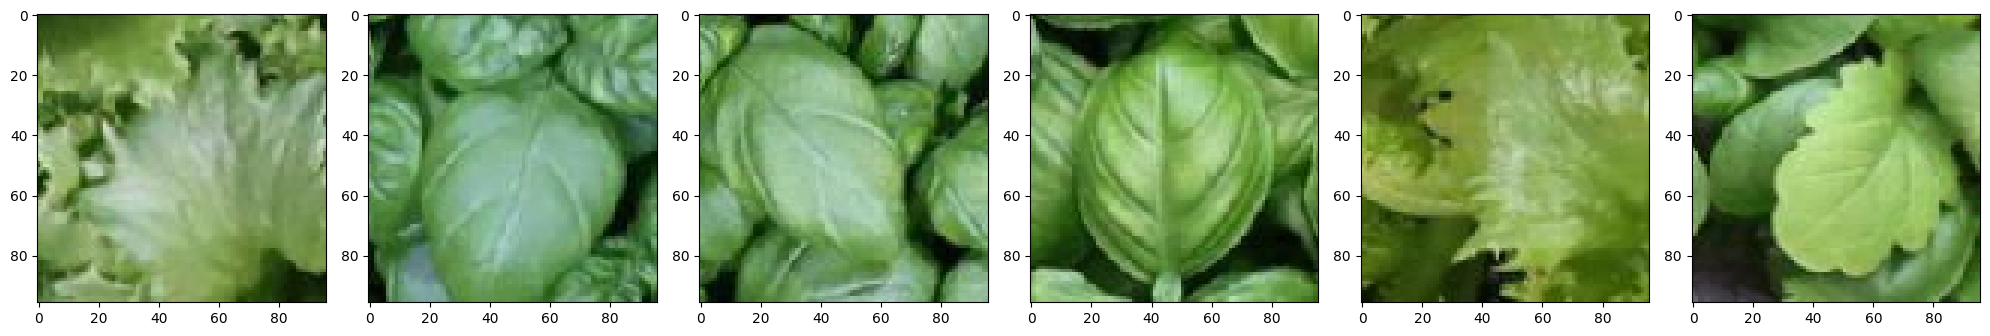

In [ ]:
#find copies of troll image with a margin of error
copies_idx_troll_margin = find_copies(troll_idx, 6200)
print(len(copies_idx_troll_margin))

copies_idx_troll_margin = list(filter(lambda x: x not in copies_idx_troll, copies_idx_troll_margin))

# visualize
num_img = min(10,len(copies_idx_troll_margin))
fig, axes = plt.subplots(1, num_img, figsize=(20,20))
for i in range(num_img):
    ax = axes[i%num_img]
    ax.imshow(np.clip(items[copies_idx_troll_margin[i]].astype("uint8"), 0, 255))
plt.tight_layout()
plt.show()

There are no other outliers that are "similar" to the troll image

In [ ]:
#removing outliers
total_indexes = set(range(5200))
set_troll_idx = set(copies_idx_troll)
set_shrek_idx = set(copies_idx_shrek)
clean_indexes = total_indexes - set_troll_idx - set_shrek_idx
clean_indexes = list(clean_indexes)
clean_data = items[clean_indexes]
clean_labels = data['labels'][clean_indexes]

print(len(items), len(copies_idx_troll), len(copies_idx_shrek), len(clean_data), len(clean_labels))

5200 98 98 5004 5004


In [ ]:
#saving cleaned dataset
np.savez('clean_data.npz', data=clean_data, labels=clean_labels)